In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz
from sklearn import externals
from io import StringIO
import pydotplus

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Company_Data.csv")
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
dataset.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
dataset.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
dataset.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


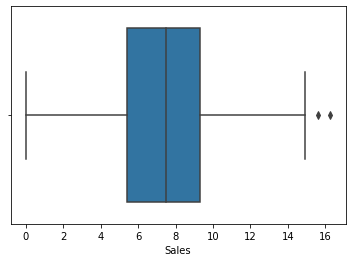

In [6]:
ax = sns.boxplot(dataset['Sales'])

2 outlier

In [7]:
plt.rcParams["figure.figsize"]=9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


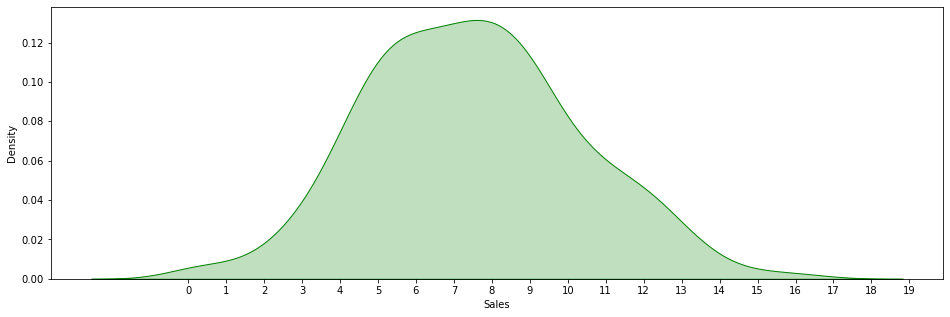

In [8]:
plt.figure(figsize=(16,5))
print("Skew: {}". format(dataset['Sales'].skew()))
print("Kurtosis: {}".format(dataset['Sales'].kurtosis()))
ax = sns.kdeplot(dataset['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skwed on the right
The data has negative Kurtosis

In [9]:
obj_colum = dataset.select_dtypes(include='object').columns.tolist()

<ipython-input-10-34e31370d252>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-10-34e31370d252>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


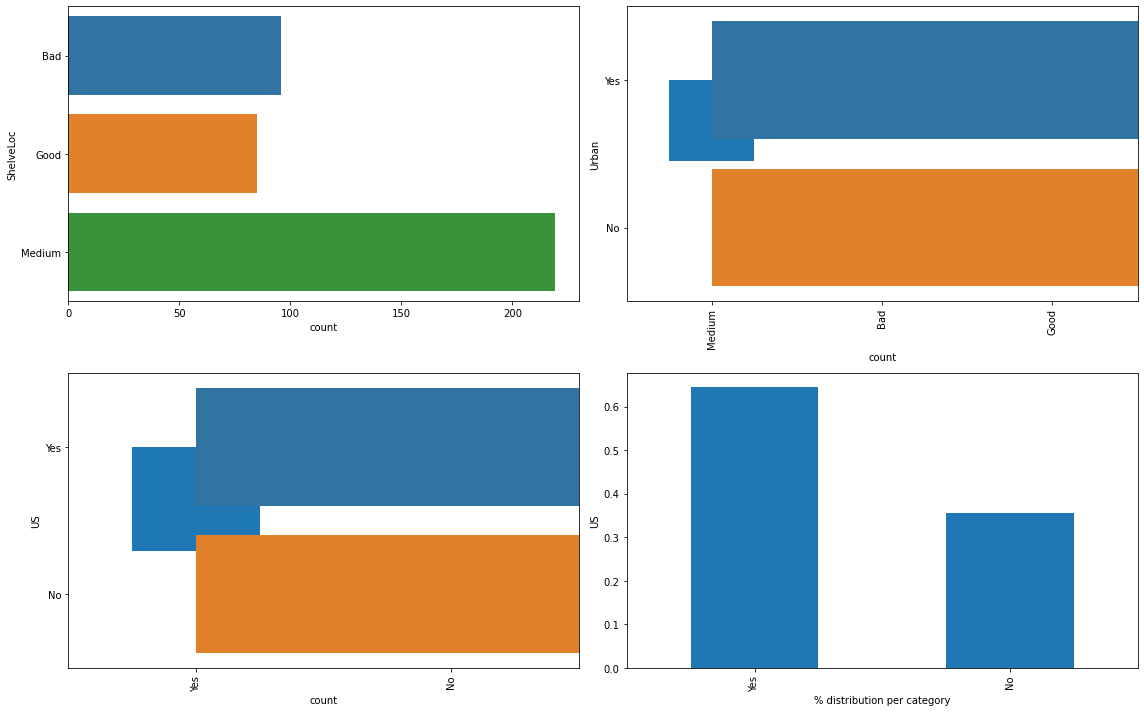

In [10]:
plt.figure(figsize=(16,10))
for i, col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dataset,y=col)
    plt.subplot(2,2,i+1)
    dataset[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [11]:
num_columns = dataset.select_dtypes(exclude = 'object').columns.tolist()

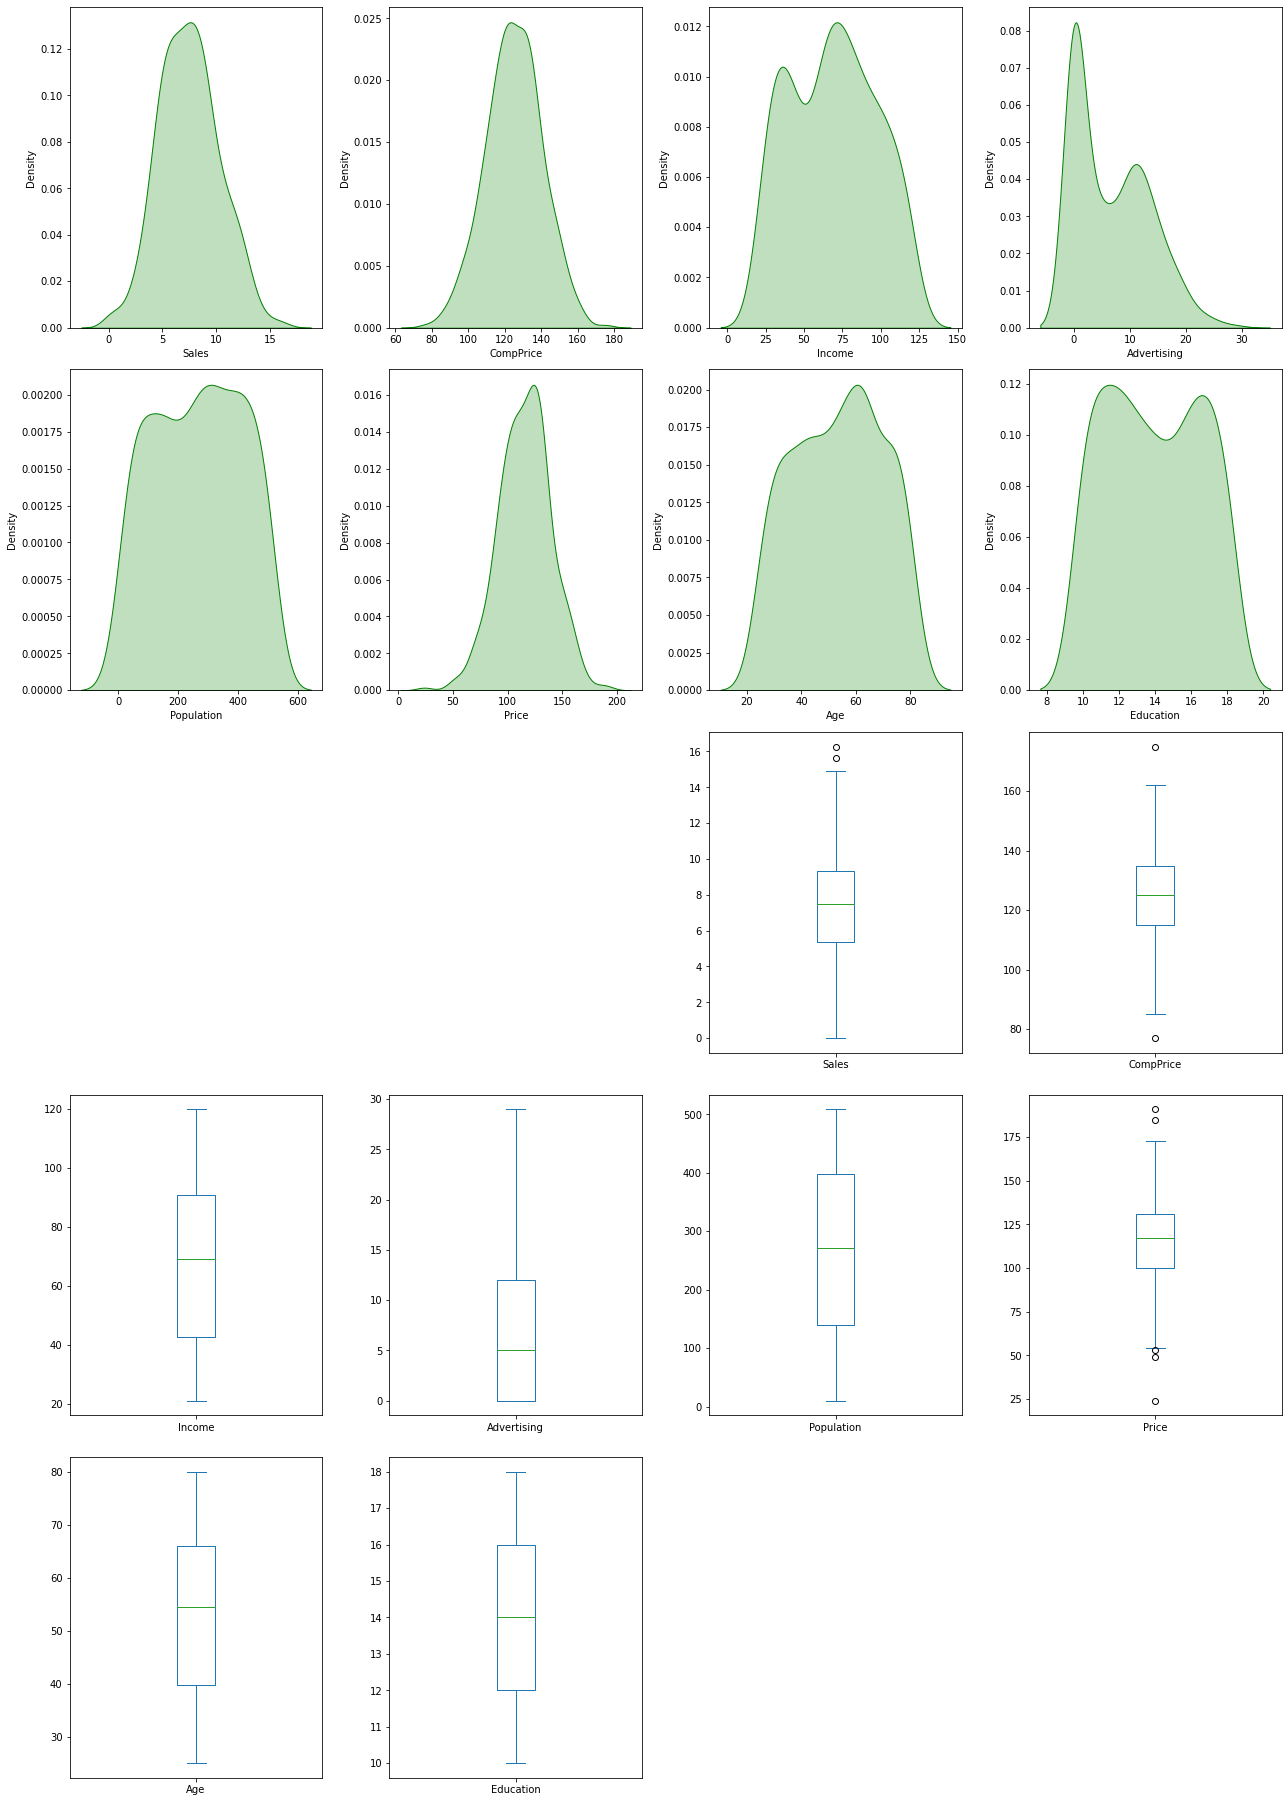

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [12]:
plt.figure(figsize= (18,40))
for i, col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(dataset[col],color='g', shade=True)
    plt.subplot(8,4,i+10)
    dataset[col].plot.box()
plt.tight_layout()
plt.show()
num_data = dataset[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [13]:
corr = dataset.corr()

In [14]:
dataset = pd.get_dummies(dataset, columns =['ShelveLoc', 'Urban','US'])

In [15]:
corr = dataset.corr()

<AxesSubplot:>

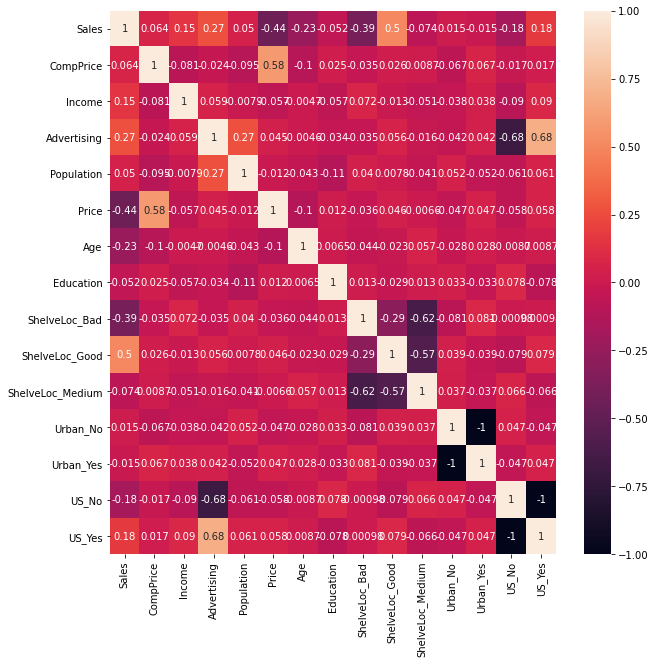

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Randam Forest


the target variable is continious, we create a class of the value based on the mean

In [17]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [18]:
dataset['Sales']=pd.cut(dataset['Sales'],bins=[0,7,20],labels=['small','large'])

In [37]:
list(dataset.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Good',
 'ShelveLoc_Medium',
 'Urban_No',
 'Urban_Yes',
 'US_No',
 'US_Yes']

In [38]:
X = dataset.iloc[:,1:14]
y = dataset.iloc[:,0]

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [40]:
y_train.value_counts()

large    165
small    155
Name: Sales, dtype: int64

In [41]:
model = RF(n_jobs=4, n_estimators = 150, oob_score = True, criterion = 'entropy')
model.fit(x_train,y_train)
model.oob_score_

0.815625

In [42]:
pred_train = model.predict(x_train)

In [43]:
accuracy_score(y_train,pred_train)

1.0

In [44]:
confusion_matrix(y_train, pred_train)

array([[165,   0],
       [  0, 155]], dtype=int64)

In [45]:
pred_test = model.predict(x_test)

In [50]:
accuracy_score(y_train,pred_train)

1.0

In [51]:
confusion_matrix(y_train,pred_train)

array([[165,   0],
       [  0, 155]], dtype=int64)

In [63]:
dataset=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [64]:
dataset

,Actual,Predicted
350,large,large
42,large,large
328,small,small
88,small,small
319,small,large
...,...,...
338,small,large
204,large,large
11,large,large
35,large,large


In [65]:
cols = list (dataset.columns)

In [66]:
predictors= cols[1:14]
target= cols[0]

In [67]:
tree1 = model.estimators_[20]

In [68]:
dot_data = StringIO()

In [70]:
export_graphviz(tree1, out_file = dot_data, feature_names =None, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [71]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [73]:
import os
os.environ["PATH"] += os.pathsep + r'C:\anaconda3\bin\Graphviz\bin'

In [74]:
graph.write_png('company_full.png')

True

In [75]:
rf_small = RF(n_estimators=10, max_depth = 3)

In [76]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [77]:
tree_small = rf_small.estimators_[5]

In [78]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [79]:
graph.write_png('fraud_small.png')

True

In [81]:
img = mpimg.imread('company_full.png')

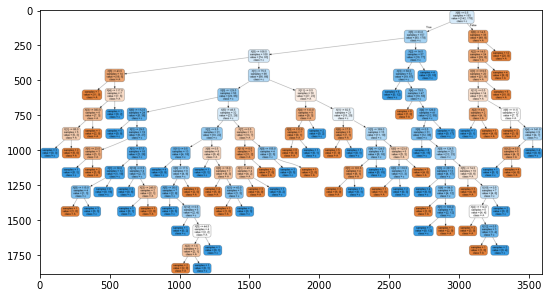

In [82]:
plt.imshow(img)

In [83]:
model.feature_importances_

array([0.11388774, 0.10240435, 0.09004336, 0.09041067, 0.21291759,
       0.12736459, 0.06417942, 0.05209795, 0.07905368, 0.02793875,
       0.01161007, 0.01061007, 0.01748176])

In [84]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [85]:
fi

,feature,importance
4,Price,0.212918
5,Age,0.127365
0,CompPrice,0.113888
1,Income,0.102404
3,Population,0.090411
2,Advertising,0.090043
8,ShelveLoc_Good,0.079054
6,Education,0.064179
7,ShelveLoc_Bad,0.052098
9,ShelveLoc_Medium,0.027939


As seen in the above table Price is most important feature